## Regression ML Pipeline Tutorial in Python (Scikit-Learn)

This notebook demonstrates how to build a machine learning pipeline for a **regression task**, using the **[California Housing dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)**  The details of Machine Leanring concepts can be found **[here](https://guides.library.sc.edu/c.php?g=1430013&p=10626775).** In this notebook, you will learn to:

- Preprocess data (missing values, scaling)
- Train a regression model
- Evaluate the model using standard metrics

**Task is to create a machine learning model that predicts the median house value (MedHouseVal), the target variable, using all the other columns as features.**

#### Prerequisites (install the libraries needed for the machine learning if not done earlier)

In [ ]:
%pip install scikit-learn

#### Step 1: Import Libraries

In [2]:
# data anaysis packages
import pandas as pd
import numpy as np

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning packages from scikit-learn
from sklearn.datasets import fetch_california_housing #fetch dataset
from sklearn.model_selection import train_test_split  
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # model evaluation


#### Step 2: Load the data

We use the California housing dataset, which includes features like median income, house age, average rooms, and target variable `MedHouseVal` (median house value). 

At this step, if we have a csv, txt, excel.... 

In [3]:
# Load sklearn built-in dataset of California housing price
data = fetch_california_housing(as_frame=True)
df = data.frame

# Preview the dataset
df.head() # print first 5 rows of the data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Step 3: Explore the dataset; find the number of rows and columns, column names, and datatype of columns

In [4]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


The data has 20,640 rows and 9 columns. We can see from above that there is no missing data in the columns and all the columns have "float" data type.

In [5]:
# Summary statistics of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


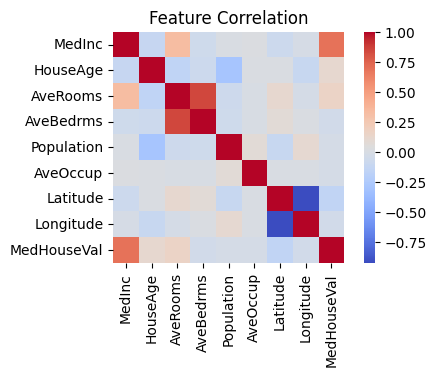

In [6]:
# plot heatmap of correlation between all the features of dataset df; we are interested in the correlation between the features (X)
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(), cmap='coolwarm', square=True)
plt.title('Feature Correlation')
plt.show()

The darker red color shows the high correlation between features. For example, the positive correlation between feature "AveBedrms" and "AveRooms" is greater than .75. At this point, we may discard one of the two highly correlated features and do further analysis.

#### Step 4: Split the data into Feature and Target form

In [7]:
X = df.drop(columns=['MedHouseVal']) # X has ALL columns except "MedHouseVal"
y = df['MedHouseVal']

#### Step 5: Train/Test Split
Randomly split the data into training an test set in the ratio of 80%(training) and 20% (testing); could be 70/30 or 75/25 also

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


#### Step 6: Data Preprocessing Pipeline (optional; if data has missing values)

We will preprocess:
- Numeric features: impute missing values with the median and scale them
  
  (a) X.select_dtypes(include=['object', 'category']) .........This selects columns from the DataFrame X whose data types are either 'object' (typically strings) or 'category' (Pandas categorical type).

  (b) .columns  ....... Retrieves the column names of the selected categorical columns.

  (c) .tolist() .........Converts the column names (which are a Index object) into a standard Python list.

  Result: The variable categorical_features will be a list of the names of all columns in X that are considered categorical features, i.e., columns containing  text or categorical data.
  
- Categorical features (if any): impute with the most frequent value and one-hot encode

In [10]:
# Detect column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [11]:
# Create Full Pipeline. We will use "Linear Regression" as the base model. You can replace this with any regressor like Random Forest or XGBoost.

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#### Step 6: **[Standardize](https://scikit-learn.org/stable/modules/preprocessing.html)** the feature values. We can directly come to this step after Step 5 if there are no missing values.

Numerical value of feature may be of different magnitudes (for example, max value of  "Population" is 35682 wheras max value of "HouseAge" is just 52. Hence, we scale the features to transform them to a similar scale (between 0 and 1), so the feature with high numerical values does not dominate the model creation.

Only feature values are scaled, NOT the target values.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Step 7: Train the Model

In [13]:
model_reg = LinearRegression()
model_reg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Step 8: Evaluate the Model

We use common regression metrics:

#### Metric Definitions

- **Mean Squared Error (MSE):** Measures average squared difference between actual and predicted values. Lower is better.

  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Mean Absolute Error (MAE):** Average absolute difference between actual and predicted values.

- **R-squared (R²):** Proportion of variance in the dependent variable that is predictable from the independent variables.

  $$
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  $$

  R² ranges from 0 to 1 (higher is better).


In [15]:
y_pred = model_reg.predict(X_test)

print("R² Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R² Score:  -4214.291797132394
Mean Absolute Error:  74.23802506908287
Mean Squared Error:  5523.756216867506


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
